#Project flow
1. Problem Identification
2. Buisness Understanding
3. Collecting data
4. Pre-processing
5. Analyzing
6. Data Modelling
7. Model Evaluation
8. Model Training
9. Model Deployement

In [125]:
#taking dataframe and importing datasets
import numpy as np
import pandas as pd

#for profiling and EDA
import ydata_profiling as pp

#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re

#for normalising the number scale
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import f_oneway

#model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#saving and loading the data
import pickle

In [2]:
df=pd.read_csv("smartwatches.csv")
df.head(10)

Unnamed: 0       Brand  Current Price  Original Price  Discount Percentage  \
0           0       noise        82990.0         89900.0             7.686318   
1           1  fire-boltt         3799.0         16999.0            77.651627   
2           2        boat         1999.0          7990.0            74.981227   
3           3  fire-boltt         1799.0         19999.0            91.004550   
4           4       noise         1599.0          4999.0            68.013603   
5           5       noise         1499.0          3999.0            62.515629   
6           6       noise         1999.0          4999.0            60.012002   
7           7       noise         1799.0          3999.0            55.013753   
8           8       noise         1999.0          6499.0            69.241422   
9           9       noise         1999.0          5999.0            66.677780   

   Rating  Number OF Ratings                              Model Name  \
0     4.0               65.0   Wrb-sw-colorfitpro4alpha-std-rgld_pnk   
1     4.3            20788.0                                  BSW046   
2     3.8            21724.0                               Wave Call   
3     4.3            13244.0                                  BSW053   
4     4.1            13901.0  Wrb-sw-colorfitpulsegobuzz-std-blk_blk   
5     4.0            32704.0                                  NSW-05   
6     4.1             1018.0                                     NaN   
7     4.0            32704.0      wrb-sw-colorfitgrand-std-rpnk_rpnk   
8     4.1            39479.0      Wrb-sw-colorfitultrase-std-gld_brn   
9     4.1            39479.0        Wrb-sw-colorfitultra-std-gry_blk   

  Dial Shape Strap Color Strap Material Touchscreen  Battery Life (Days)  \
0        NaN         NaN            NaN         NaN                  8.0   
1        NaN         NaN        Silicon         Yes                  3.5   
2        NaN         NaN        Silicon         Yes                  8.0   
3        NaN         NaN        Silicon         Yes                  3.5   
4        NaN         NaN          Other         Yes                  8.0   
5        NaN         NaN          Other         Yes                  8.0   
6        NaN         NaN            NaN         NaN                  NaN   
7        NaN         NaN          Other         Yes                  8.0   
8        NaN         NaN          Other         Yes                  8.0   
9        NaN         NaN          Other         Yes                  8.0   

  Bluetooth Display Size     Weight  
0       Yes          NaN  35 - 50 g  
1       Yes   1.8 inches  50 - 75 g  
2       Yes   1.7 inches  35 - 50 g  
3       Yes   1.8 inches      75g +  
4       Yes   1.7 inches  35 - 50 g  
5       Yes   1.7 inches  35 - 50 g  
6       Yes   1.4 inches  35 - 50 g  
7       Yes   1.7 inches  35 - 50 g  
8       Yes   1.8 inches  35 - 50 g  
9       Yes   1.8 inches  35 - 50 g

In [3]:
df.drop_duplicates(inplace=True)

In [4]:
df.shape

(450, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           450 non-null    int64  
 1   Brand                450 non-null    object 
 2   Current Price        440 non-null    float64
 3   Original Price       377 non-null    float64
 4   Discount Percentage  377 non-null    float64
 5   Rating               444 non-null    float64
 6   Number OF Ratings    391 non-null    float64
 7   Model Name           415 non-null    object 
 8   Dial Shape           327 non-null    object 
 9   Strap Color          327 non-null    object 
 10  Strap Material       381 non-null    object 
 11  Touchscreen          413 non-null    object 
 12  Battery Life (Days)  418 non-null    float64
 13  Bluetooth            444 non-null    object 
 14  Display Size         420 non-null    object 
 15  Weight               264 non-null    obj

In [6]:
df.describe()

Unnamed: 0  Current Price  Original Price  Discount Percentage  \
count  450.000000     440.000000      377.000000           377.000000   
mean   224.500000   12747.554545    14598.204244            48.236894   
std    130.048068   17760.666099    15450.028869            24.109830   
min      0.000000    1199.000000     1669.000000           -79.688436   
25%    112.250000    2180.750000     5999.000000            33.337037   
50%    224.500000    3999.000000     7999.000000            54.550414   
75%    336.750000   17121.750000    17999.000000            66.677780   
max    449.000000  139990.000000    96390.000000            91.004550   

           Rating  Number OF Ratings  Battery Life (Days)  
count  444.000000         391.000000           418.000000  
mean     4.031306       11594.726343            14.077392  
std      0.550548       40423.889227             7.718503  
min      1.000000           1.000000             0.750000  
25%      3.900000          68.500000             8.000000  
50%      4.100000         996.000000            17.500000  
75%      4.300000        6022.000000            22.000000  
max      5.000000      619130.000000            22.000000

EDA

In [7]:
#taking 80% of the data for sample from  the orignal dataset
#train_df=df.sample(frac=0.8,random_state=42)
#train_df=train_df.reset_index()

In [8]:
#taking the other remaining 20% data from orignal dataset for testing
#test_df=df.drop(train_df.index)
#test_df=test_df.reset_index()

In [9]:
train_df=df.copy()
train_df.dtypes

Unnamed: 0               int64
Brand                   object
Current Price          float64
Original Price         float64
Discount Percentage    float64
Rating                 float64
Number OF Ratings      float64
Model Name              object
Dial Shape              object
Strap Color             object
Strap Material          object
Touchscreen             object
Battery Life (Days)    float64
Bluetooth               object
Display Size            object
Weight                  object
dtype: object

In [10]:
train_df.isnull().sum()

Unnamed: 0               0
Brand                    0
Current Price           10
Original Price          73
Discount Percentage     73
Rating                   6
Number OF Ratings       59
Model Name              35
Dial Shape             123
Strap Color            123
Strap Material          69
Touchscreen             37
Battery Life (Days)     32
Bluetooth                6
Display Size            30
Weight                 186
dtype: int64

In [11]:
#seprating the train_df data in numerical and continuos data:
numerical_data= [feature for feature in train_df.columns if train_df[feature].dtype != 'object']
numerical_data

['Unnamed: 0',
 'Current Price',
 'Original Price',
 'Discount Percentage',
 'Rating',
 'Number OF Ratings',
 'Battery Life (Days)']

In [12]:
continuos_data= [feature for feature in train_df.columns if train_df[feature].dtype == 'object']
continuos_data

['Brand',
 'Model Name',
 'Dial Shape',
 'Strap Color',
 'Strap Material',
 'Touchscreen',
 'Bluetooth',
 'Display Size',
 'Weight']

In [13]:
train_df[numerical_data].describe()

Unnamed: 0  Current Price  Original Price  Discount Percentage  \
count  450.000000     440.000000      377.000000           377.000000   
mean   224.500000   12747.554545    14598.204244            48.236894   
std    130.048068   17760.666099    15450.028869            24.109830   
min      0.000000    1199.000000     1669.000000           -79.688436   
25%    112.250000    2180.750000     5999.000000            33.337037   
50%    224.500000    3999.000000     7999.000000            54.550414   
75%    336.750000   17121.750000    17999.000000            66.677780   
max    449.000000  139990.000000    96390.000000            91.004550   

           Rating  Number OF Ratings  Battery Life (Days)  
count  444.000000         391.000000           418.000000  
mean     4.031306       11594.726343            14.077392  
std      0.550548       40423.889227             7.718503  
min      1.000000           1.000000             0.750000  
25%      3.900000          68.500000             8.000000  
50%      4.100000         996.000000            17.500000  
75%      4.300000        6022.000000            22.000000  
max      5.000000      619130.000000            22.000000

In [14]:
#checking correlation
train_df_corr=train_df[numerical_data].corr()

In [15]:
#checking skewness
train_df[numerical_data].skew()

Unnamed: 0              0.000000
Current Price           2.724376
Original Price          2.668311
Discount Percentage    -0.944123
Rating                 -1.570849
Number OF Ratings      10.220186
Battery Life (Days)    -0.183545
dtype: float64

In [16]:
pp.ProfileReport(train_df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#Univariate plots

1. Histogram
2. Density Plots
3. Box and whisker plot

#Multivariate plots

1. correlation matrix
2. scatter plot

DATA VISUALIZATION

In [17]:

numerical_data.remove('Unnamed: 0')

In [18]:
numerical_data

['Current Price',
 'Original Price',
 'Discount Percentage',
 'Rating',
 'Number OF Ratings',
 'Battery Life (Days)']

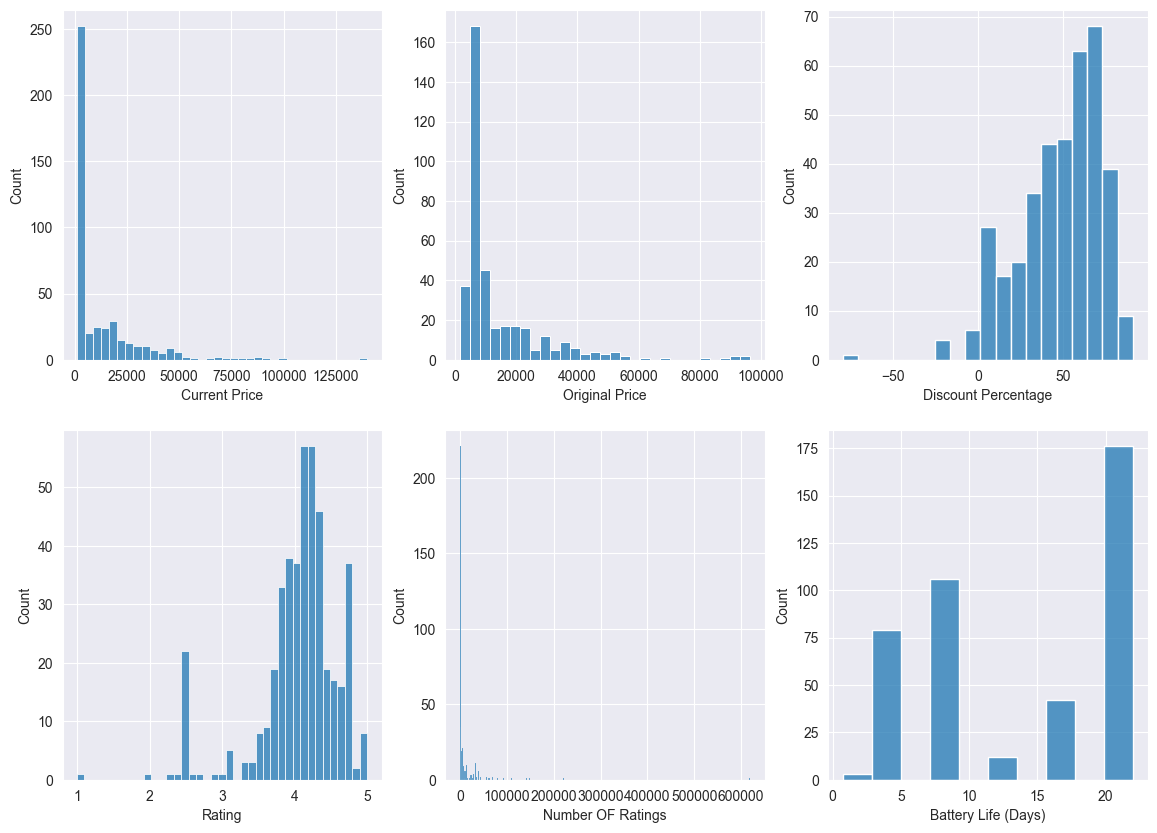

In [19]:
#hist plot
fig,axes= plt.subplots(nrows=2,ncols=3,figsize=(14,10))

for i , column in enumerate (numerical_data):
    row= i//3
    col= i%3
    ax= axes[row,col]
    sns.histplot(data=train_df[column],ax=ax)
    
plt.show()

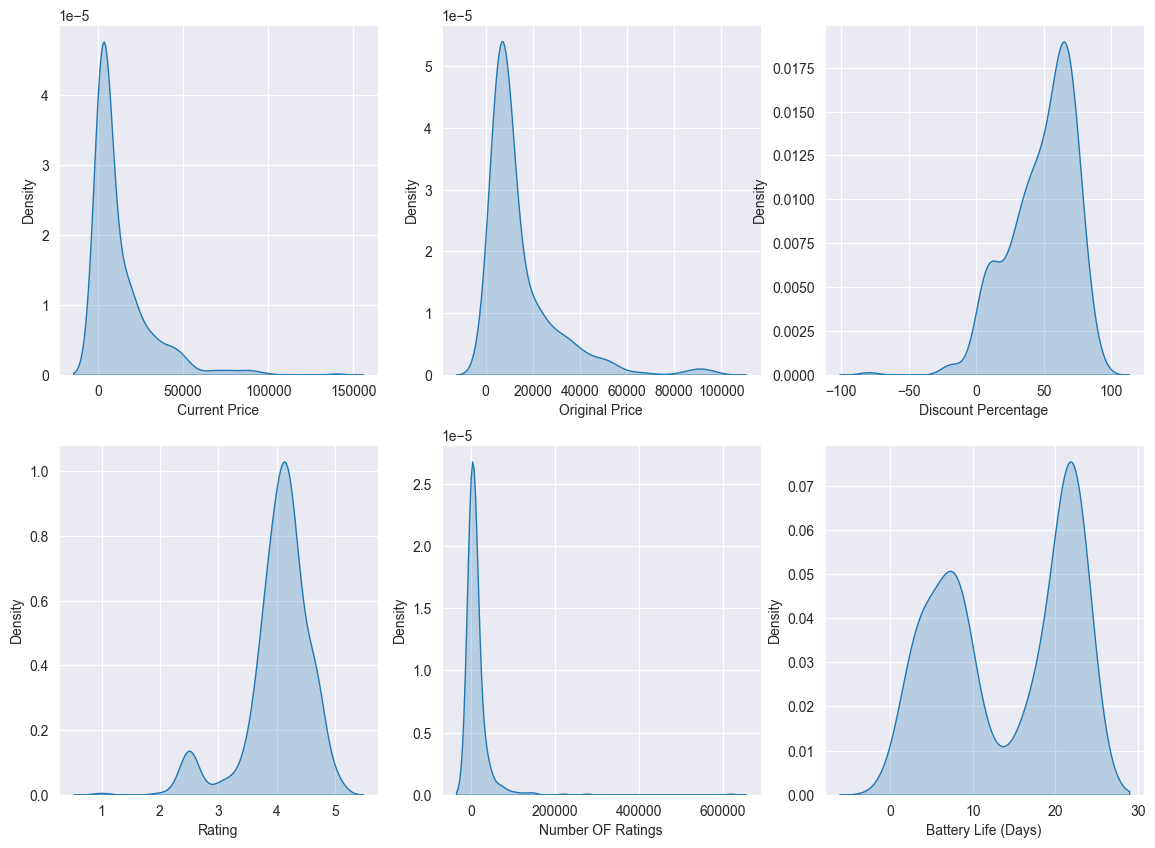

In [20]:
#kde plot (Kernel Density Estimate Plot)
fig,axes= plt.subplots(nrows=2,ncols=3,figsize=(14,10))

for i , column in enumerate (numerical_data):
    row= i//3
    col= i%3
    ax= axes[row,col]
    sns.kdeplot(data=train_df[column],ax=ax,fill=True)
    
plt.show()

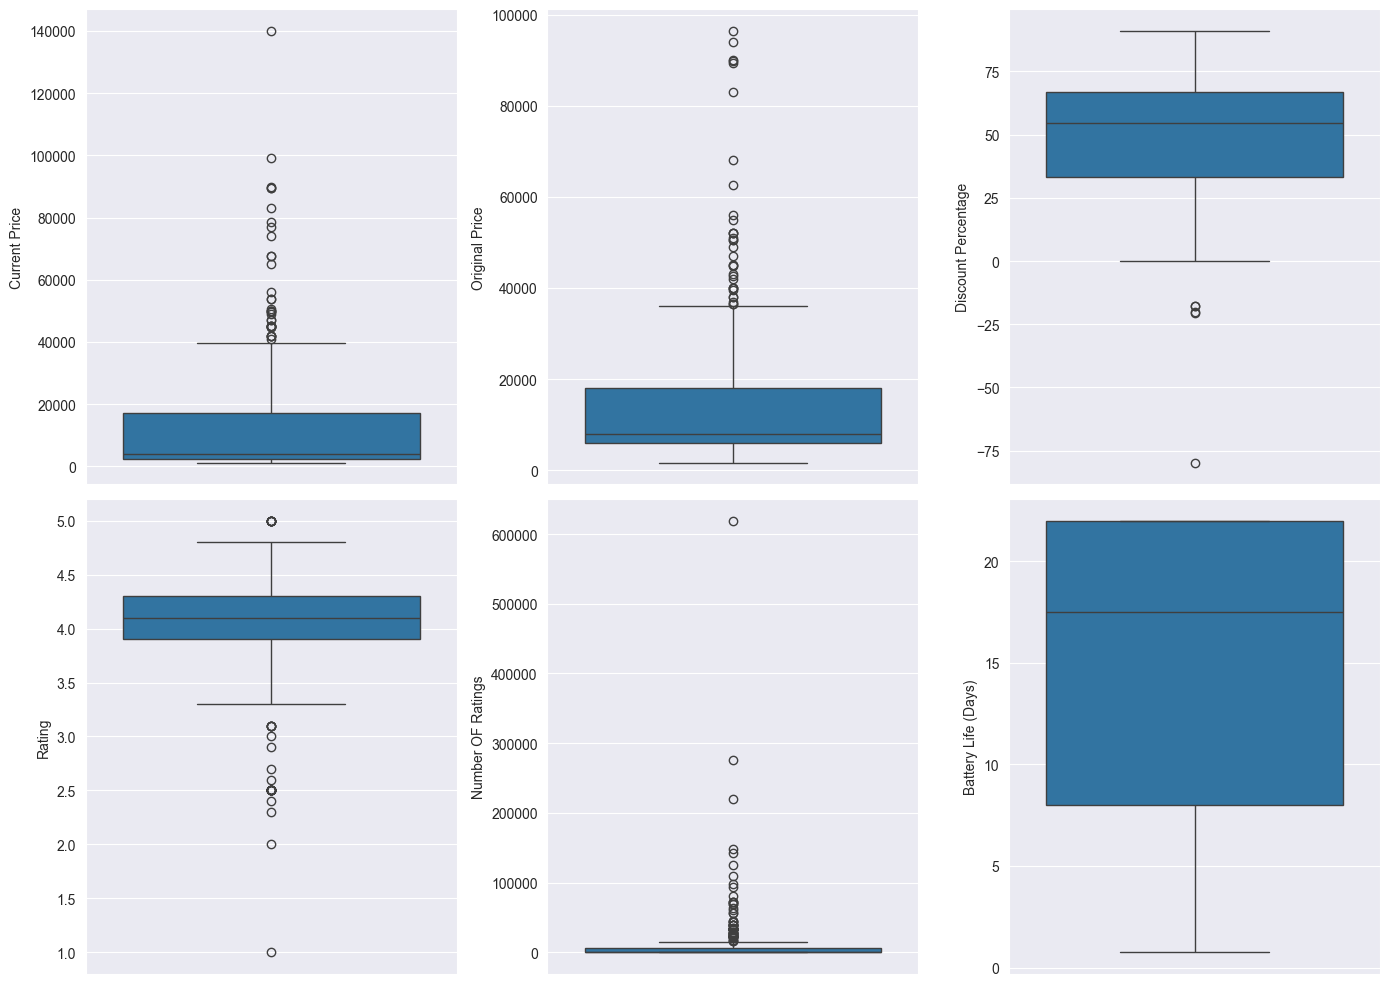

In [21]:
#box plot
fig,axes= plt.subplots(nrows=2,ncols=3,figsize=(14,10))

for i , column in enumerate (numerical_data):
    row= i//3
    col= i%3
    ax= axes[row,col]
    sns.boxplot(data=train_df[column],ax=ax)
 
fig.tight_layout()    
plt.show()

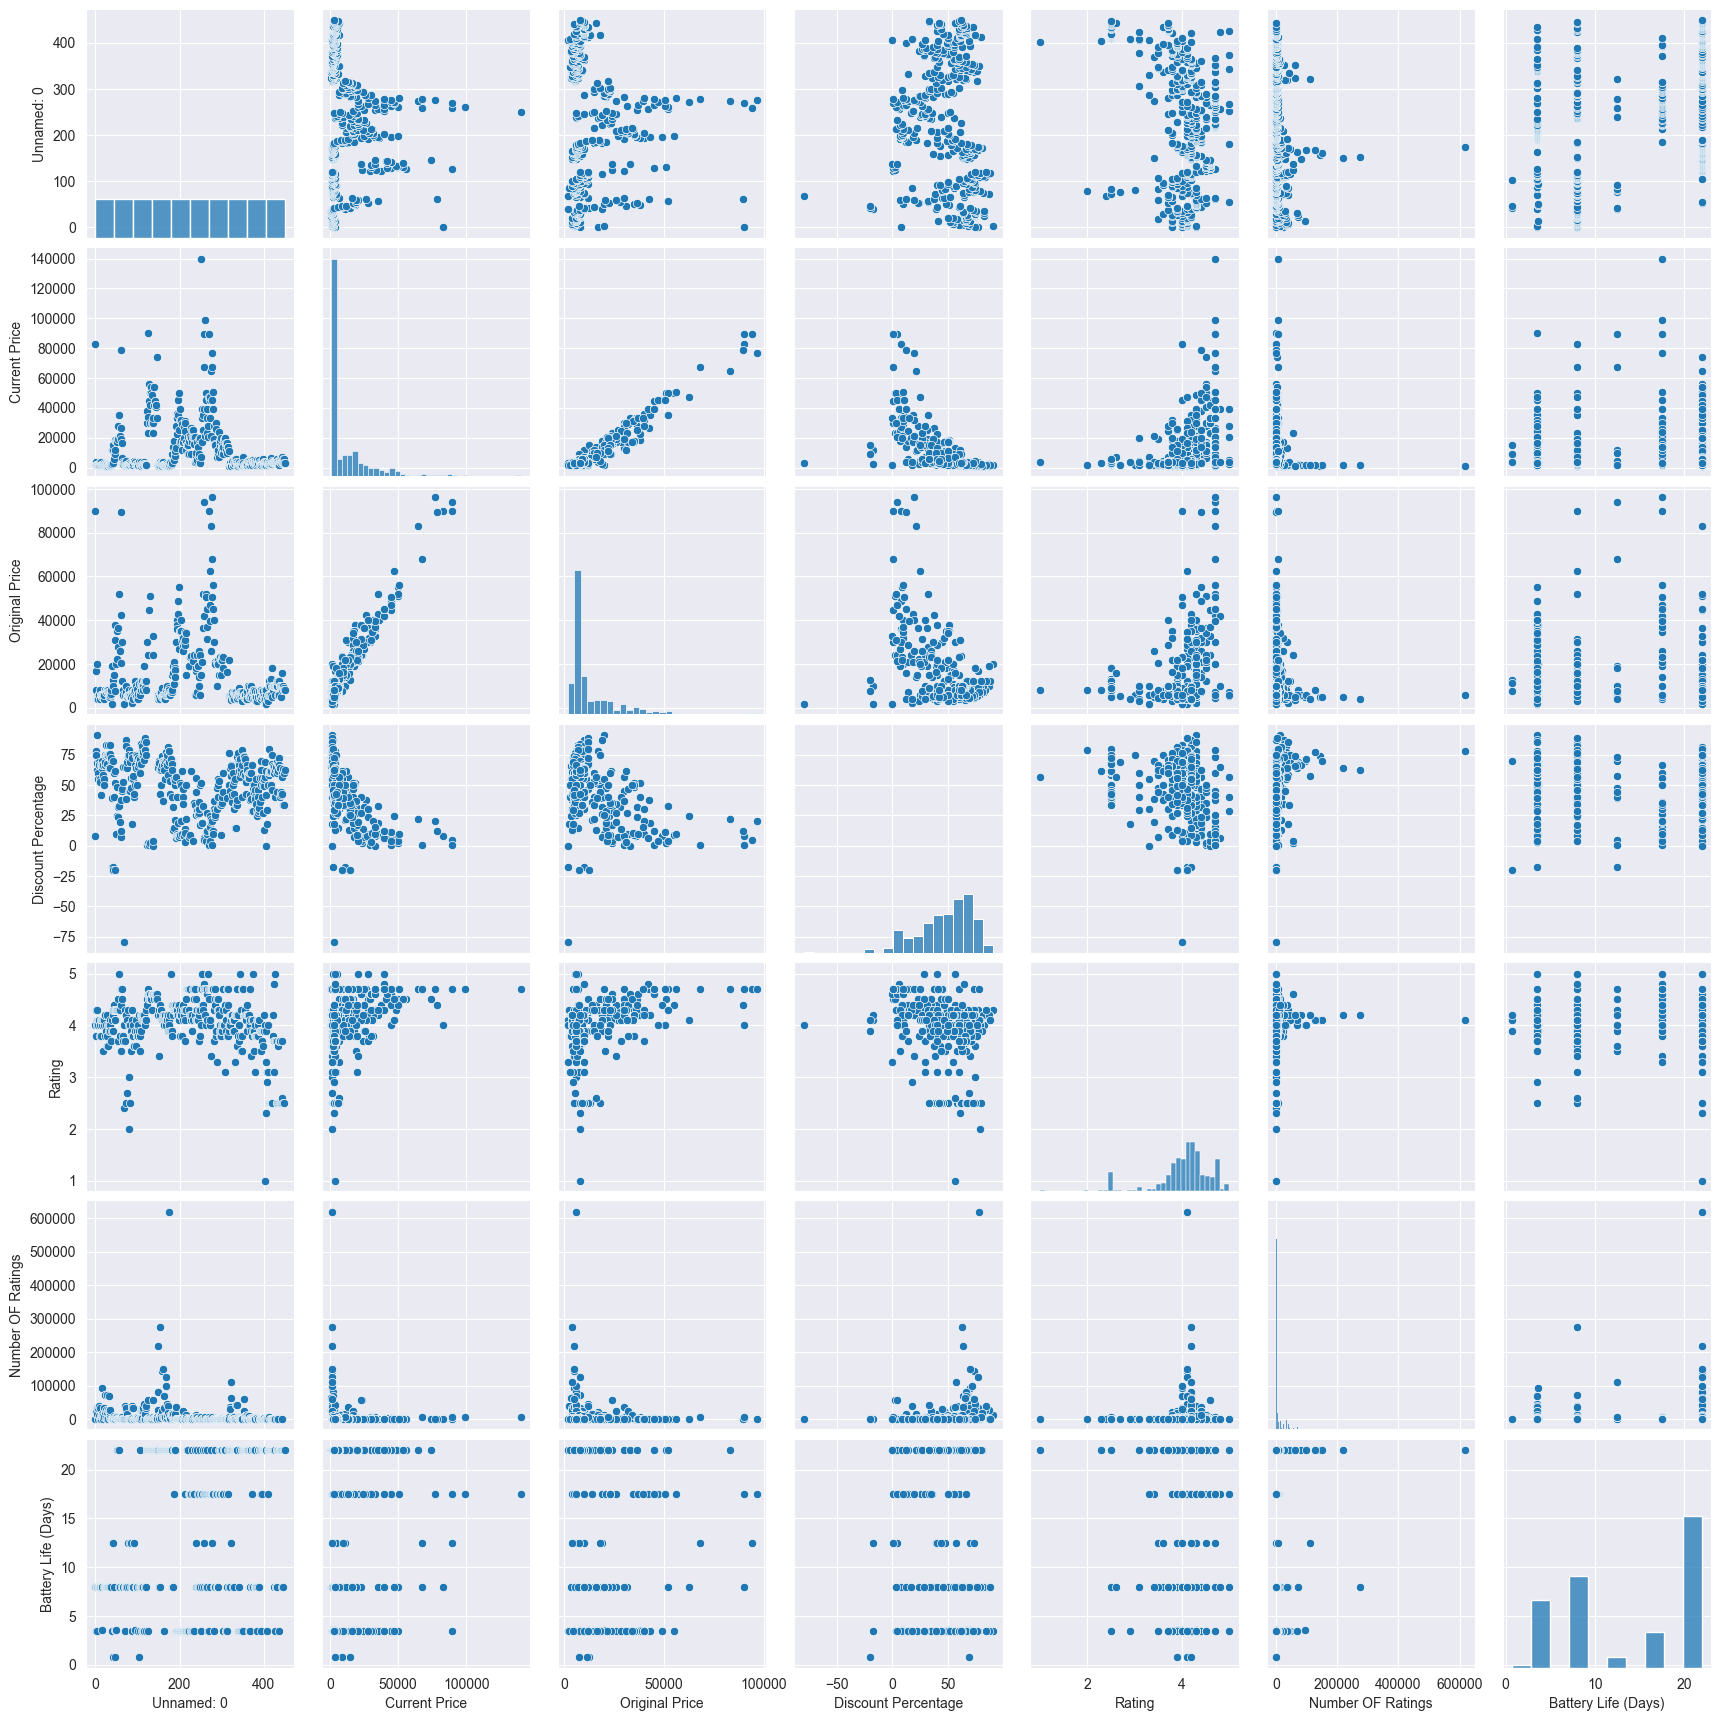

In [22]:
#pair plot for checking relationship between 2 values
sns.pairplot(train_df)

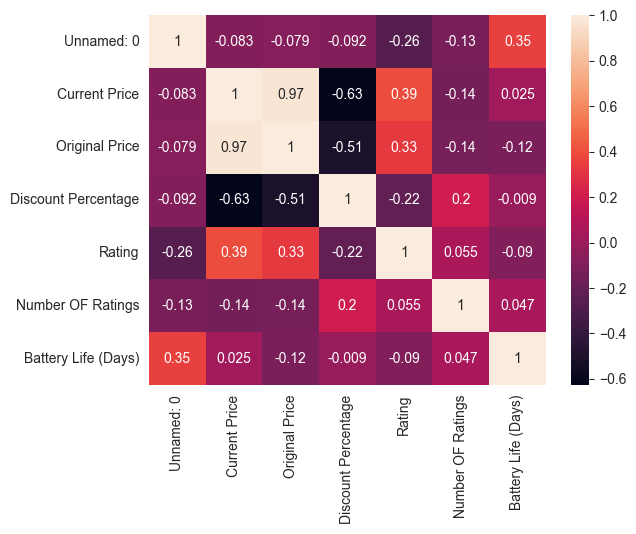

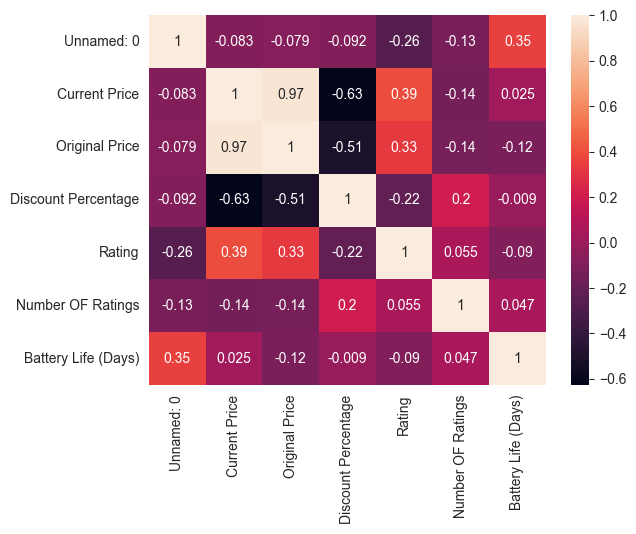

In [23]:
sns.heatmap(train_df_corr,annot=True)
plt.show(0)

In [24]:
train_df

Unnamed: 0       Brand  Current Price  Original Price  \
0             0       noise        82990.0         89900.0   
1             1  fire-boltt         3799.0         16999.0   
2             2        boat         1999.0          7990.0   
3             3  fire-boltt         1799.0         19999.0   
4             4       noise         1599.0          4999.0   
..          ...         ...            ...             ...   
445         445  fire-boltt         5999.0          8999.0   
446         446  fire-boltt         3700.0          9999.0   
447         447  fire-boltt         5999.0          8999.0   
448         448  fire-boltt         3200.0          7999.0   
449         449  fire-boltt         3000.0          7999.0   

     Discount Percentage  Rating  Number OF Ratings  \
0               7.686318     4.0               65.0   
1              77.651627     4.3            20788.0   
2              74.981227     3.8            21724.0   
3              91.004550     4.3            13244.0   
4              68.013603     4.1            13901.0   
..                   ...     ...                ...   
445            33.337037     2.5                NaN   
446            62.996300     NaN                NaN   
447            33.337037     2.5                NaN   
448            59.994999     NaN                NaN   
449            62.495312     NaN                NaN   

                                 Model Name Dial Shape Strap Color  \
0     Wrb-sw-colorfitpro4alpha-std-rgld_pnk        NaN         NaN   
1                                    BSW046        NaN         NaN   
2                                 Wave Call        NaN         NaN   
3                                    BSW053        NaN         NaN   
4    Wrb-sw-colorfitpulsegobuzz-std-blk_blk        NaN         NaN   
..                                      ...        ...         ...   
445                                  bsw003     Circle        Grey   
446                               beast pro     Square       Black   
447                                  bsw003     Circle        Gold   
448                                  call 2     Square        Blue   
449                                  call 2     Square       Black   

    Strap Material Touchscreen  Battery Life (Days) Bluetooth Display Size  \
0              NaN         NaN                  8.0       Yes          NaN   
1          Silicon         Yes                  3.5       Yes   1.8 inches   
2          Silicon         Yes                  8.0       Yes   1.7 inches   
3          Silicon         Yes                  3.5       Yes   1.8 inches   
4            Other         Yes                  8.0       Yes   1.7 inches   
..             ...         ...                  ...       ...          ...   
445        Silicon         Yes                 22.0       Yes   1.3 inches   
446        Silicon         Yes                  8.0       Yes   0.1 inches   
447        Silicon         Yes                 22.0       Yes   1.3 inches   
448        Silicon         Yes                 22.0       Yes   0.1 inches   
449        Silicon         Yes                 22.0       Yes   0.1 inches   

        Weight  
0    35 - 50 g  
1    50 - 75 g  
2    35 - 50 g  
3        75g +  
4    35 - 50 g  
..         ...  
445        NaN  
446        NaN  
447        NaN  
448        NaN  
449        NaN  

[450 rows x 16 columns]

In [25]:
train_df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [26]:
print(train_df['Display Size'].isnull().sum())

30


In [27]:

#unique values
train_df['Display Size'].value_counts()

Display Size
1.7 inches     68
1.3 inches     64
1.8 inches     60
1.4 inches     43
0.1 inches     36
1.6 inches     28
1.9 inches     26
1.2 inches     20
1.1 inches      7
0.2 inches      7
1.5 inches      7
4.3 inches      6
0.9 inches      6
4.4 inches      5
1.0 inches      4
0.8 inches      2
35.9 inches     2
2.0 inches      2
3.5 inches      2
4.5 inches      2
2.7 inches      2
20.0 inches     2
3.3 inches      2
2.1 inches      1
45.0 inches     1
30.0 inches     1
0.0 inches      1
6.9 inches      1
4.2 inches      1
2.3 inches      1
33.0 inches     1
18.5 inches     1
27.9 inches     1
0.5 inches      1
3.0 inches      1
15.9 inches     1
0.6 inches      1
4.6 inches      1
4.0 inches      1
2.4 inches      1
Name: count, dtype: int64

In [28]:

train_df['Display Size'] = train_df['Display Size'].fillna('0.0 inches')

In [29]:
train_df['Display Size'] = train_df['Display Size'].apply(lambda x: float(str(x).split()[0]))

In [30]:
train_df['Display Size']=train_df['Display Size'].replace(0.0,np.nan)

In [31]:
train_df['Display Size'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 450 entries, 0 to 449
Series name: Display Size
Non-Null Count  Dtype  
--------------  -----  
419 non-null    float64
dtypes: float64(1)
memory usage: 3.6 KB


In [32]:
train_df['Weight'].value_counts()

Weight
20 - 35 g    80
75g +        66
35 - 50 g    58
<= 20 g      43
50 - 75 g    17
Name: count, dtype: int64

In [33]:
re.findall('\d+','20 - 35 g')

['20', '35']

In [34]:
cal=sum([int(x) for x in re.findall('\d+','20 - 35 g')]) / 2
cal

27.5

In [35]:
train_df['Weight']=train_df['Weight'].replace('20 - 35 g',cal)

In [36]:
cal2=sum([int(x) for x in re.findall('\d+','35 - 50 g')]) / 2
cal2

42.5

In [37]:
train_df['Weight']=train_df['Weight'].replace('35 - 50 g',cal2)

In [38]:
cal3=sum([int(x) for x in re.findall('\d+','50 - 75 g')]) / 2
cal3

62.5

In [39]:
train_df['Weight']=train_df['Weight'].replace('50 - 75 g',cal3)

In [40]:
train_df['Weight']=train_df['Weight'].replace('75g +',float(re.findall('\d+','75g +')[0]))

In [41]:
train_df['Weight']=train_df['Weight'].replace('<= 20 g',float(re.findall('\d+','<= 20 g')[0]))

C:\Users\Public\Documents\iSkysoft\CreatorTemp\ipykernel_17620\2883208283.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df['Weight']=train_df['Weight'].replace('<= 20 g',float(re.findall('\d+','<= 20 g')[0]))


In [42]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                450 non-null    object 
 1   Current Price        440 non-null    float64
 2   Original Price       377 non-null    float64
 3   Discount Percentage  377 non-null    float64
 4   Rating               444 non-null    float64
 5   Number OF Ratings    391 non-null    float64
 6   Model Name           415 non-null    object 
 7   Dial Shape           327 non-null    object 
 8   Strap Color          327 non-null    object 
 9   Strap Material       381 non-null    object 
 10  Touchscreen          413 non-null    object 
 11  Battery Life (Days)  418 non-null    float64
 12  Bluetooth            444 non-null    object 
 13  Display Size         419 non-null    float64
 14  Weight               264 non-null    float64
dtypes: float64(8), object(7)
memory usage: 5

In [43]:
train_df['Discount Price']=(train_df['Original Price'] * (-train_df['Discount Percentage']))/100

In [44]:
train_df['Discount Price']

0      -6910.000000
1     -13200.000001
2      -5991.000000
3     -18200.000000
4      -3400.000000
           ...     
445    -3000.000000
446    -6299.000000
447    -3000.000000
448    -4799.000000
449    -4999.000000
Name: Discount Price, Length: 450, dtype: float64

In [45]:
train_df.drop(['Discount Percentage'],axis=1,inplace=True)

In [46]:
train_df

Brand  Current Price  Original Price  Rating  Number OF Ratings  \
0         noise        82990.0         89900.0     4.0               65.0   
1    fire-boltt         3799.0         16999.0     4.3            20788.0   
2          boat         1999.0          7990.0     3.8            21724.0   
3    fire-boltt         1799.0         19999.0     4.3            13244.0   
4         noise         1599.0          4999.0     4.1            13901.0   
..          ...            ...             ...     ...                ...   
445  fire-boltt         5999.0          8999.0     2.5                NaN   
446  fire-boltt         3700.0          9999.0     NaN                NaN   
447  fire-boltt         5999.0          8999.0     2.5                NaN   
448  fire-boltt         3200.0          7999.0     NaN                NaN   
449  fire-boltt         3000.0          7999.0     NaN                NaN   

                                 Model Name Dial Shape Strap Color  \
0     Wrb-sw-colorfitpro4alpha-std-rgld_pnk        NaN         NaN   
1                                    BSW046        NaN         NaN   
2                                 Wave Call        NaN         NaN   
3                                    BSW053        NaN         NaN   
4    Wrb-sw-colorfitpulsegobuzz-std-blk_blk        NaN         NaN   
..                                      ...        ...         ...   
445                                  bsw003     Circle        Grey   
446                               beast pro     Square       Black   
447                                  bsw003     Circle        Gold   
448                                  call 2     Square        Blue   
449                                  call 2     Square       Black   

    Strap Material Touchscreen  Battery Life (Days) Bluetooth  Display Size  \
0              NaN         NaN                  8.0       Yes           NaN   
1          Silicon         Yes                  3.5       Yes           1.8   
2          Silicon         Yes                  8.0       Yes           1.7   
3          Silicon         Yes                  3.5       Yes           1.8   
4            Other         Yes                  8.0       Yes           1.7   
..             ...         ...                  ...       ...           ...   
445        Silicon         Yes                 22.0       Yes           1.3   
446        Silicon         Yes                  8.0       Yes           0.1   
447        Silicon         Yes                 22.0       Yes           1.3   
448        Silicon         Yes                 22.0       Yes           0.1   
449        Silicon         Yes                 22.0       Yes           0.1   

     Weight  Discount Price  
0      42.5    -6910.000000  
1      62.5   -13200.000001  
2      42.5    -5991.000000  
3      75.0   -18200.000000  
4      42.5    -3400.000000  
..      ...             ...  
445     NaN    -3000.000000  
446     NaN    -6299.000000  
447     NaN    -3000.000000  
448     NaN    -4799.000000  
449     NaN    -4999.000000  

[450 rows x 15 columns]

Numerical Data

In [47]:
numerical_col=[feature for feature in train_df.columns if train_df[feature].dtype=='float64']

In [48]:
def remove_outliers_iqr(data,col):
    q1=data[col].quantile(0.25)
    q3=data[col].quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    return data[(data[col]>lower_bound) & (data[col]<upper_bound)]

In [49]:
train_df.columns

Index(['Brand', 'Current Price', 'Original Price', 'Rating',
       'Number OF Ratings', 'Model Name', 'Dial Shape', 'Strap Color',
       'Strap Material', 'Touchscreen', 'Battery Life (Days)', 'Bluetooth',
       'Display Size', 'Weight', 'Discount Price'],
      dtype='object')

In [50]:
import_col = ['Current Price','Original Price','Rating','Number OF Ratings','Display Size','Discount Price']

In [51]:
for col in import_col:
    train_df=remove_outliers_iqr(train_df,col)

In [52]:
for col in numerical_col:
    print(col)
    train_df[col]=train_df[col].fillna(train_df[col].median())

Current Price
Original Price
Rating
Number OF Ratings
Battery Life (Days)
Display Size
Weight
Discount Price


In [53]:
train_df[numerical_col].isnull().sum()

Current Price          0
Original Price         0
Rating                 0
Number OF Ratings      0
Battery Life (Days)    0
Display Size           0
Weight                 0
Discount Price         0
dtype: int64

In [54]:
train_df.shape

(168, 15)

In [55]:
train_df.isnull().sum() 

Brand                   0
Current Price           0
Original Price          0
Rating                  0
Number OF Ratings       0
Model Name              9
Dial Shape             58
Strap Color            58
Strap Material         24
Touchscreen             5
Battery Life (Days)     0
Bluetooth               0
Display Size            0
Weight                  0
Discount Price          0
dtype: int64

In [56]:
scaler=MinMaxScaler()

In [57]:
data=scaler.fit_transform(train_df[numerical_col[:-1]])

In [58]:
data

array([[0.03434803, 0.22996018, 0.41666667, ..., 0.34117647, 0.53846154,
        0.40909091],
       [0.01717402, 0.1176095 , 0.66666667, ..., 0.34117647, 0.53846154,
        0.40909091],
       [0.01288051, 0.08004658, 0.58333333, ..., 0.34117647, 0.53846154,
        0.40909091],
       ...,
       [0.02996866, 0.00116445, 0.        , ..., 1.        , 1.        ,
        0.40909091],
       [0.12021811, 0.30542409, 0.33333333, ..., 1.        , 0.53846154,
        0.40909091],
       [0.12021811, 0.30542409, 0.33333333, ..., 1.        , 0.53846154,
        0.40909091]])

In [59]:
data=pd.DataFrame(data,columns=numerical_col[:-1])

In [60]:
data.head()

Current Price  Original Price    Rating  Number OF Ratings  \
0       0.034348        0.229960  0.416667           0.650096   
1       0.017174        0.117609  0.666667           0.415958   
2       0.012881        0.080047  0.583333           0.978720   
3       0.034348        0.117609  0.666667           0.030378   
4       0.025761        0.080047  0.583333           0.978720   

   Battery Life (Days)  Display Size    Weight  
0             0.341176      0.538462  0.409091  
1             0.341176      0.538462  0.409091  
2             0.341176      0.538462  0.409091  
3             0.670588      0.307692  0.409091  
4             0.341176      0.538462  0.409091

In [61]:
train_df.drop(numerical_col[:-1],axis=1,inplace=True)

In [62]:
train_df.head()

Brand                              Model Name Dial Shape Strap Color  \
2   boat                               Wave Call        NaN         NaN   
4  noise  Wrb-sw-colorfitpulsegobuzz-std-blk_blk        NaN         NaN   
5  noise                                  NSW-05        NaN         NaN   
6  noise                                     NaN        NaN         NaN   
7  noise      wrb-sw-colorfitgrand-std-rpnk_rpnk        NaN         NaN   

  Strap Material Touchscreen Bluetooth  Discount Price  
2        Silicon         Yes       Yes         -5991.0  
4          Other         Yes       Yes         -3400.0  
5          Other         Yes       Yes         -2500.0  
6            NaN         NaN       Yes         -3000.0  
7          Other         Yes       Yes         -2200.0

In [63]:
train_df=pd.concat([train_df,data],axis=1)

In [64]:
train_df.head()

Brand                              Model Name Dial Shape Strap Color  \
2   boat                               Wave Call        NaN         NaN   
4  noise  Wrb-sw-colorfitpulsegobuzz-std-blk_blk        NaN         NaN   
5  noise                                  NSW-05        NaN         NaN   
6  noise                                     NaN        NaN         NaN   
7  noise      wrb-sw-colorfitgrand-std-rpnk_rpnk        NaN         NaN   

  Strap Material Touchscreen Bluetooth  Discount Price  Current Price  \
2        Silicon         Yes       Yes         -5991.0       0.012881   
4          Other         Yes       Yes         -3400.0       0.025761   
5          Other         Yes       Yes         -2500.0       0.034348   
6            NaN         NaN       Yes         -3000.0       0.025761   
7          Other         Yes       Yes         -2200.0       0.034348   

   Original Price    Rating  Number OF Ratings  Battery Life (Days)  \
2        0.080047  0.583333           0.978720             0.341176   
4        0.080047  0.583333           0.978720             0.341176   
5        0.155172  0.666667           0.262241             0.341176   
6        0.080047  0.583333           0.978720             0.341176   
7        0.155172  0.666667           0.271699             0.670588   

   Display Size    Weight  
2      0.538462  0.409091  
4      0.538462  0.409091  
5      0.692308  0.409091  
6      0.538462  0.409091  
7      0.615385  0.409091

In [65]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 265 entries, 2 to 167
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                168 non-null    object 
 1   Model Name           159 non-null    object 
 2   Dial Shape           110 non-null    object 
 3   Strap Color          110 non-null    object 
 4   Strap Material       144 non-null    object 
 5   Touchscreen          163 non-null    object 
 6   Bluetooth            168 non-null    object 
 7   Discount Price       168 non-null    float64
 8   Current Price        168 non-null    float64
 9   Original Price       168 non-null    float64
 10  Rating               168 non-null    float64
 11  Number OF Ratings    168 non-null    float64
 12  Battery Life (Days)  168 non-null    float64
 13  Display Size         168 non-null    float64
 14  Weight               168 non-null    float64
dtypes: float64(8), object(7)
memory usage: 33.1+ 

Categorical Columns

In [66]:

categorical_col=[feature for feature in train_df.columns if train_df[feature].dtype=='object']

In [67]:
categorical_col

['Brand',
 'Model Name',
 'Dial Shape',
 'Strap Color',
 'Strap Material',
 'Touchscreen',
 'Bluetooth']

In [68]:
train_df[categorical_col].head()

Brand                              Model Name Dial Shape Strap Color  \
2   boat                               Wave Call        NaN         NaN   
4  noise  Wrb-sw-colorfitpulsegobuzz-std-blk_blk        NaN         NaN   
5  noise                                  NSW-05        NaN         NaN   
6  noise                                     NaN        NaN         NaN   
7  noise      wrb-sw-colorfitgrand-std-rpnk_rpnk        NaN         NaN   

  Strap Material Touchscreen Bluetooth  
2        Silicon         Yes       Yes  
4          Other         Yes       Yes  
5          Other         Yes       Yes  
6            NaN         NaN       Yes  
7          Other         Yes       Yes

In [69]:
categorical_col.remove('Bluetooth')

In [70]:
categorical_col

['Brand',
 'Model Name',
 'Dial Shape',
 'Strap Color',
 'Strap Material',
 'Touchscreen']

In [71]:
train_df.columns

Index(['Brand', 'Model Name', 'Dial Shape', 'Strap Color', 'Strap Material',
       'Touchscreen', 'Bluetooth', 'Discount Price', 'Current Price',
       'Original Price', 'Rating', 'Number OF Ratings', 'Battery Life (Days)',
       'Display Size', 'Weight'],
      dtype='object')

In [72]:
for col in categorical_col:
    CategoryGroupLists = train_df.groupby(col)['Discount Price'].apply(list)
    AnovaResults = f_oneway(*CategoryGroupLists)
    print(col, ':', 'P-value for anova is : ', AnovaResults[1])


Brand : P-value for anova is :  2.2690793666425778e-14
Model Name : P-value for anova is :  0.0011692845190458814
Dial Shape : P-value for anova is :  0.00021528924461733005
Strap Color : P-value for anova is :  0.8411979599948191
Strap Material : P-value for anova is :  0.10131901223287385
Touchscreen : P-value for anova is :  0.8234182809935802


In [73]:
train_df.columns

Index(['Brand', 'Model Name', 'Dial Shape', 'Strap Color', 'Strap Material',
       'Touchscreen', 'Bluetooth', 'Discount Price', 'Current Price',
       'Original Price', 'Rating', 'Number OF Ratings', 'Battery Life (Days)',
       'Display Size', 'Weight'],
      dtype='object')

In [74]:
imp_col=['Brand','Model Name','Dial Shape','Strap Material']

In [75]:
train_df[imp_col].head()

Brand                              Model Name Dial Shape Strap Material
2   boat                               Wave Call        NaN        Silicon
4  noise  Wrb-sw-colorfitpulsegobuzz-std-blk_blk        NaN          Other
5  noise                                  NSW-05        NaN          Other
6  noise                                     NaN        NaN            NaN
7  noise      wrb-sw-colorfitgrand-std-rpnk_rpnk        NaN          Other

In [76]:
for col in imp_col:
    train_df[col]=train_df[col].fillna('other')

In [81]:
train_df[imp_col].isnull().sum()

Brand             0
Model Name        0
Dial Shape        0
Strap Material    0
dtype: int64

In [82]:
brand=pd.get_dummies(train_df['Brand']).drop(['other'],axis=1)
model_name=pd.get_dummies(train_df['Model Name']).drop(['other'],axis=1)
dial_shape=pd.get_dummies(train_df['Dial Shape']).drop(['other'],axis=1)
strap_material=pd.get_dummies(train_df['Strap Material']).drop(['other'],axis=1)

In [83]:
imp_df=pd.concat([brand,model_name,dial_shape,strap_material],axis=1)

In [84]:
imp_df.head()

amazfit  ambrane   boat  crossbeats   dizo  fire-boltt  fitbit  fossil  \
2    False    False   True       False  False       False   False   False   
4    False    False  False       False  False       False   False   False   
5    False    False  False       False  False       False   False   False   
6    False    False  False       False  False       False   False   False   
7    False    False  False       False  False       False   False   False   

   garmin  gizmore  ...  Leather  Metal  Nylon  Other  Plastic  Rubber  \
2   False    False  ...    False  False  False  False    False   False   
4   False    False  ...    False  False  False   True    False   False   
5   False    False  ...    False  False  False   True    False   False   
6   False    False  ...    False  False  False  False    False   False   
7   False    False  ...    False  False  False   True    False   False   

   Silicon  Stainless Steel  Synthetic  Thermo Plastic Polyurethene  
2     True            False      False                        False  
4    False            False      False                        False  
5    False            False      False                        False  
6    False            False      False                        False  
7    False            False      False                        False  

[5 rows x 180 columns]

In [85]:
new_df=pd.concat([train_df[numerical_col],imp_df],axis=1)

In [86]:
new_df.head()

Current Price  Original Price    Rating  Number OF Ratings  \
2       0.012881        0.080047  0.583333           0.978720   
4       0.025761        0.080047  0.583333           0.978720   
5       0.034348        0.155172  0.666667           0.262241   
6       0.025761        0.080047  0.583333           0.978720   
7       0.034348        0.155172  0.666667           0.271699   

   Battery Life (Days)  Display Size    Weight  Discount Price  amazfit  \
2             0.341176      0.538462  0.409091         -5991.0    False   
4             0.341176      0.538462  0.409091         -3400.0    False   
5             0.341176      0.692308  0.409091         -2500.0    False   
6             0.341176      0.538462  0.409091         -3000.0    False   
7             0.670588      0.615385  0.409091         -2200.0    False   

   ambrane  ...  Leather  Metal  Nylon  Other  Plastic  Rubber  Silicon  \
2    False  ...    False  False  False  False    False   False     True   
4    False  ...    False  False  False   True    False   False    False   
5    False  ...    False  False  False   True    False   False    False   
6    False  ...    False  False  False  False    False   False    False   
7    False  ...    False  False  False   True    False   False    False   

   Stainless Steel  Synthetic  Thermo Plastic Polyurethene  
2            False      False                        False  
4            False      False                        False  
5            False      False                        False  
6            False      False                        False  
7            False      False                        False  

[5 rows x 188 columns]

In [101]:
new_df.fillna(0,inplace=True)

Model Building

In [102]:
x=new_df.drop('Discount Price',axis=1)
y=new_df['Discount Price']

In [103]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [106]:
#linear regression
lr_model= LinearRegression()
lr_model.fit(x_train,y_train)
y_pred=lr_model.predict(x_test)

res=r2_score(y_test,y_pred)
print(res)

-1.3212266795061078e+24


In [108]:
 #decision tree regressor
dt_model= DecisionTreeRegressor()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)
res=r2_score(y_test,y_pred)
print(res)

0.390409772325891


In [110]:
#ensemble technique
rf_model=RandomForestRegressor()
rf_model.fit(x_train,y_train)
y_pred=rf_model.predict(x_test)
res=r2_score(y_test,y_pred)
print(res)

0.6363379618374279


In [112]:
#xgboost

model=xgb.XGBRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
res=r2_score(y_test,y_pred)
print(res)

0.5606869471937159


In [116]:
#cross val score

dt_model= DecisionTreeRegressor()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)
res=r2_score(y_test,y_pred)
print(res)

score=cross_val_score(dt_model,x,y,cv=5,scoring='r2')

print('cross_val_score: ',score,score.mean(),score.std())

0.4237624570874873
cross_val_score:  [-2.24270365 -0.61905244 -2.2496465  -1.12327405  0.        ] -1.2469353292062497 0.890096735926354


In [119]:
#cross val score

rf_model=RandomForestRegressor()
rf_model.fit(x_train,y_train)
y_pred=rf_model.predict(x_test)
res=r2_score(y_test,y_pred)
print(res)

score=cross_val_score(rf_model,x,y,cv=5,scoring='r2')

print('cross_val_score: ',score,score.mean(),score.std())

0.6570870529618995
cross_val_score:  [-1.92248488 -0.22683414 -0.57846817 -0.30192446  0.        ] -0.605942330087369 0.6837185253172635


In [120]:
#cross val score

model=xgb.XGBRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
res=r2_score(y_test,y_pred)
print(res)

score=cross_val_score(model,x,y,cv=5,scoring='r2')

print('cross_val_score: ',score,score.mean(),score.std())

0.5606869471937159
cross_val_score:  [-1.80153077  0.08416358 -1.62331505 -1.33214901  0.        ] -0.9345662485908015 0.8118249789135509


In [123]:
#Grid Search Cv
param_grid={
    'n_estimators':[100,200,300],
    'max_depth':[3,4,5],
    'learning_rate':[0.01,0.1,0.2]
}

grid_search=GridSearchCV(estimator=model,param_grid=param_grid,cv=5,scoring='r2')
grid_search.fit(x_train,y_train)

best_params=grid_search.best_params_

best_model=xgb.XGBRegressor(**best_params)

best_model.fit(x_train,y_train)
y_pred=best_model.predict(x_test)
r2=r2_score(y_test,y_pred)
print(r2)

0.5910372865428313


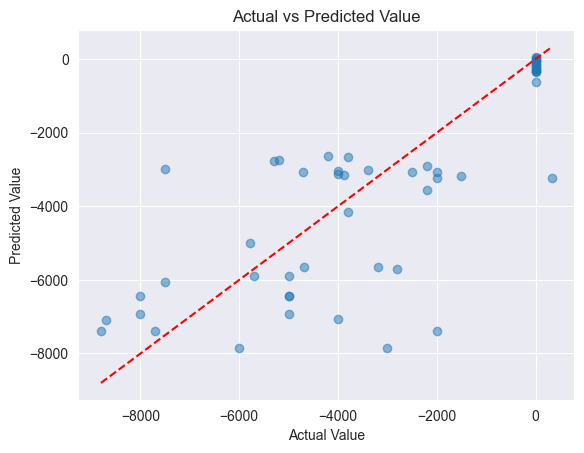

In [124]:
#visualizing the result
plt.scatter(y_test,y_pred,alpha=0.5)

plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],'r',linestyle='--')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Actual vs Predicted Value')
plt.show()

In [128]:
#saving and loading the data using pickle

with open('model.pkl','wb') as f:
    pickle.dump(best_model,f)
    #wb = writing
    #rb = reading

In [127]:
with open('model.pkl','rb') as f:
    xgb_model = pickle.load(f)

In [129]:
y_pred = xgb_model.predict(x_test)

print(r2_score(y_test,y_pred))

0.5910372865428313
